In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
np.random.seed(0)

# Model definition

Logistic regression can be thought of as an extension of the perceptron: instead of just looking at which half-space the new example $x$ belongs to, we also account for the distance of that example from the decision boundary and return a probability that $x$ belongs to the positive class.

In order to calculate that probability we use a non-linear function called the *sigmoid function*:
$$g(z) = {1 \over {1 + e^{-z}}}$$

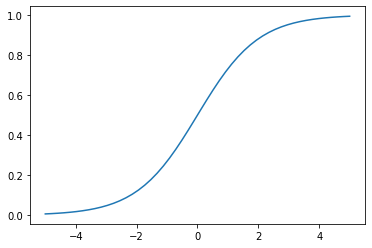

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

X = np.linspace(-5, 5)
y = sigmoid(X)

plt.plot(X, y)
plt.show()

Thus, our hypothesis is defined as follows:
$$h_\theta(x) = g(\theta^T x) = {1 \over {1 + e^{-\theta^T x}}}$$

In [3]:
def h(x, theta):
    dot = np.dot(theta.T, x)
    return sigmoid(dot)[0][0]

We will use binary cross-entropy as our cost function:
$$J(\theta) = -{1 \over m} \sum_{i=1}^{m} \Big( y^{(i)} log(h_\theta(x^{(i)})) + (1 - y^{(i)}) log(1 - h_\theta(x^{(i)})) \Big)$$

In [4]:
def J(X, y, theta):
    m = X.shape[0]
    h = sigmoid(np.matmul(X, theta))
    in_sum = np.multiply(y, np.log(h)) + np.multiply(1 - y, np.log(1 - h))
    
    return -1 / m * np.sum(in_sum)

The partial derivative of $J(\theta)$ for each $\theta_j$:
$${\partial \over {\partial \theta_j}} J(\theta) = {1 \over m} \sum_{i=1}^{m} \Big((h_\theta(X^{(i)}) - y^{(i)}) \cdot X^{(i)}_j \Big)$$

In [5]:
def J_deriv(X, y, theta):
    m = X.shape[0]
    err = sigmoid(np.matmul(X, theta)) - y
    
    return 1 / m * np.matmul(X.T, err)

In [6]:
def gradient_descent(X, y, starting_theta, alpha=0.01, epochs=5):
    theta = np.copy(starting_theta)
    errors = [J(X, y, theta)]
    
    for epoch in range(epochs):
        derivs = J_deriv(X, y, theta)
        theta -= alpha * derivs
        
        errors.append(J(X, y, theta))
    
    return theta, errors

# Linear regression in practice

### 1. Generating data

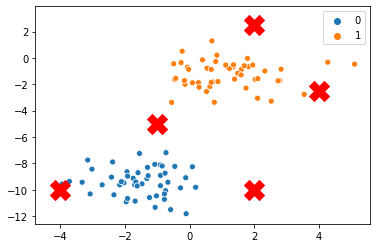

In [7]:
from sklearn.datasets import make_blobs

X1, y_train = make_blobs(n_samples=100, centers=2, n_features=2, random_state=2)
X_train = np.append(np.ones((X1.shape[0], 1)), X1, axis=1)
sns.scatterplot(x=X1[:, 0], y=X1[:, 1], hue=y_train)

X2 = np.array([[-4, -10], [2, -10], [4, -2.5], [2, 2.5], [-1, -5]]) # some random points on the scatterplot
X_test = np.append(np.ones((X2.shape[0], 1)), X2, axis=1)
plt.scatter(x=X2[:, 0], y=X2[:, 1], marker='X', s=20 ** 2, color='red')

plt.show()

### 2. Training the model

In [8]:
theta, errors = gradient_descent(X_train, y_train, np.random.normal(size=X_train.shape[1]), alpha=0.1, epochs=1000)
y_test = (sigmoid(np.matmul(X_test, theta)) > 0.5).astype(int)

theta, y_test

(array([4.05288019, 1.55698853, 0.81522684]), array([0, 0, 1, 1, 0]))

In [9]:
k = -theta[1] / theta[2]
b = -theta[0] / theta[2]

line_X1 = np.linspace(-4, 4)
line_X2 = k * line_X1 + b

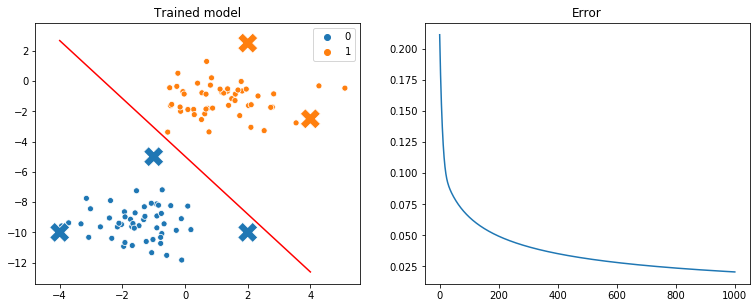

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6.4 * 2, 4.8))

sns.scatterplot(x=X1[:, 0], y=X1[:, 1], hue=y_train, ax=ax1)
sns.scatterplot(x=X2[:, 0], y=X2[:, 1], hue=y_test, legend=False, marker='X', s=20 ** 2, ax=ax1)
ax1.plot(line_X1, line_X2, 'r')
ax1.set_title('Trained model')

ax2.plot(errors)
ax2.set_title('Error')

plt.show()